# Julia-MELTS interface demo

This Jupyter notebook runs the <a href="https://github.com/brenhinkeller/StatGeochem.jl" target="_blank">StatGeochem</a> package, which includes some of the codes and utilities used in Keller & Schoene 2012 (<a href="https://doi.org/10.1038/nature11024" target="_blank">https://doi.org/10.1038/nature11024</a>) Keller et al. 2015 (<a href="https://doi.org/10.1038/nature14584" target="_blank">https://doi.org/10.1038/nature14584</a>) and Keller & Schoene 2018 (<a href="https://doi.org/10.1016/j.epsl.2017.10.031" target="_blank">https://doi.org/10.1016/j.epsl.2017.10.031</a>) implemented in the <a href="https://julialang.org" target="_blank">Julia language</a>.

Any code from this notebook can also be copied and pasted into the Julia REPL or a `.jl` script

(hint: shift-enter to run and move to the next code cell)

In [1]:
## --- Load (and install if neccesary) the StatGeochem package which has the resampling functions we'll want
try
    using StatGeochem
catch
    Pkg.clone("https://github.com/brenhinkeller/StatGeochem.jl")
    using StatGeochem
end

using Plots; gr();

In [2]:
## --- Try to download and install alphamelts
alphameltsversion = "linux_alphamelts_1-9"
download("https://magmasource.caltech.edu/alphamelts/zipfiles/$alphameltsversion.zip","./$alphameltsversion.zip")
run(`unzip -o $alphameltsversion.zip`);

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1967k  100 1967k    0     0   626k      0  0:00:03  0:00:03 --:--:--  626k


#### Run alphamelts

In [3]:
## --- # # # # # # # # # # # pMelts equil. batch melting # # # # # # # # # # # #
# configure it. The absolute path to the alphamelts perl script must be input here:
meltspath = pwd()*"/$alphameltsversion/run_alphamelts.command"

# The absolute or relative path to a direcory where you want to run MELTS -
# A number of configuration and output files will be written here.
scratchdir = pwd()*"/scratch/"

# Conditions
P_range = [20000,20000]
T_range = [1700,800]
# Starting composition
elements = ["SiO2",  "TiO2","Al2O3","Fe2O3","Cr2O3",  "FeO",  "MnO",  "MgO",   "NiO",  "CoO",  "CaO",  "Na2O", "K2O", "P2O5", "H2O",]
composition=[44.8030, 0.1991, 4.4305, 0.9778, 0.3823, 7.1350, 0.1344, 37.6345, 0.2489, 0.0129, 3.5345, 0.3584, 0.0289, 0.0209, 0.15,] #mcdbse (McDonough Pyrolite)
# Run simulation
melts_configure(meltspath, scratchdir, composition, elements, T_range, P_range,
    batchstring="1\nsc.melts\n10\n1\n3\n1\nliquid\n1\n1.0\n0\n10\n0\n4\n0\n",
    dT=-10, dP=0, index=1, version="pMELTS",mode="isobaric",fo2path="FMQ",
    verbose=false)

# Read results
melt_comp = melts_query_liquid(scratchdir, index=1)
solid_comp = melts_query_solid(scratchdir, index=1)
modes = melts_query_modes(scratchdir, index=1)

Dict{Any,Any} with 14 entries:
  "Temperature"     => [1624.07, 1614.07, 1604.07, 1594.07, 1584.07, 1574.07, 1…
  "water"           => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.…
  "orthopyroxene_0" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.96064, 11.4105, 14.2824…
  "elements"        => Any["Pressure", "Temperature", "mass", "liquid_0", "oliv…
  "clinopyroxene_0" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  11…
  "mass"            => [99.9575, 99.9544, 99.9515, 99.949, 99.9467, 99.9445, 99…
  "olivine_0"       => [0.0, 8.88223, 16.6072, 23.3962, 29.1114, 33.9796, 36.01…
  "hornblende_0"    => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  3.…
  "garnet_0"        => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  11…
  "spinel_0"        => [0.0, 0.0, 0.0, 0.134547, 0.235384, 0.321473, 0.464989, …
  "liquid_0"        => [99.9575, 91.0722, 83.3443, 76.4183, 70.5999, 65.6434, 5…
  "apatite"         => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0

Archive:  linux_alphamelts_1-9.zip
  inflating: linux_alphamelts_1-9/Amoeba.melts  
  inflating: linux_alphamelts_1-9/Morb.melts  
  inflating: linux_alphamelts_1-9/Workman_Hart_DMM.melts  
  inflating: linux_alphamelts_1-9/file_format.command  
  inflating: linux_alphamelts_1-9/frac_xtal_env.txt  
  inflating: linux_alphamelts_1-9/update.command  
  inflating: linux_alphamelts_1-9/McKenzie_ONions_DM.melts  
  inflating: linux_alphamelts_1-9/default_trace_data.txt  
  inflating: linux_alphamelts_1-9/alphamelts_linux64  
  inflating: linux_alphamelts_1-9/2004GC000816.pdf  
  inflating: linux_alphamelts_1-9/McKenzie_ONions_PM.melts  
  inflating: linux_alphamelts_1-9/Sun_McDonough_PM.melts  
  inflating: linux_alphamelts_1-9/alphamelts_manual.pdf  
  inflating: linux_alphamelts_1-9/run_alphamelts.command  
  inflating: linux_alphamelts_1-9/isentropic_melt_env.txt  
  inflating: linux_alphamelts_1-9/column_pick.command  
  inflating: linux_alphamelts_1-9/install.command  
  inflating: lin

#### Plot results

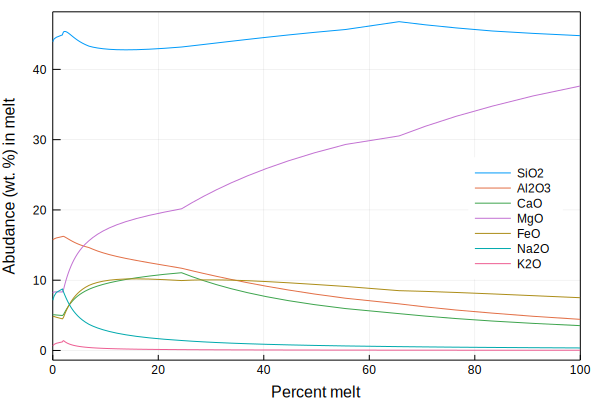

In [4]:
## --- Plot melt composition
h = plot(xlabel="Percent melt",ylabel="Abudance (wt. %) in melt")
for e in ["SiO2","Al2O3","CaO","MgO","FeO","Na2O","K2O"]
    plot!(h,melt_comp["mass"],melt_comp[e],label=e)
end
plot!(h,xlims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:right)
display(h)

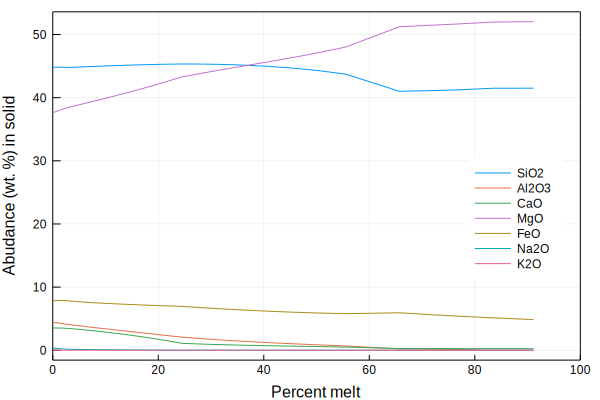

In [5]:
## --- Plot solid composition
h = plot(xlabel="Percent melt",ylabel="Abudance (wt. %) in solid")
for e in ["SiO2","Al2O3","CaO","MgO","FeO","Na2O","K2O"]
    plot!(h,100-solid_comp["mass"],solid_comp[e],label=e)
end
plot!(h,xlims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:right)
display(h)

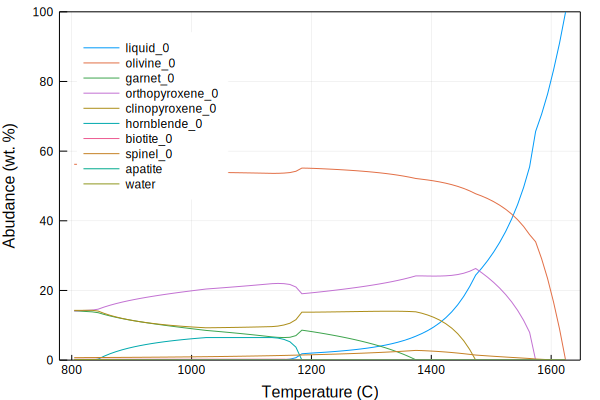

In [6]:
## --- Plot phase modes
h = plot(xlabel="Temperature (C)",ylabel="Abudance (wt. %)")
for m in modes["elements"][4:end]
    plot!(h,modes["Temperature"],modes[m],label=m)
end
plot!(h,ylims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:topleft)
display(h)